**College data-Tree models** - In this project I explored the use of tree methods to classify schools as Private or Public based off their features.

The data has been obtained from the ISLR library, the College data frame.

A data frame with 777 observations on the following 18 variables.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [2]:
install.packages("ISLR")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [ ]:
#Loading college dataset from ISLR package
library(ISLR)

In [4]:
df<-College
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
install.packages("ggplot2")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [6]:
library(ggplot2)

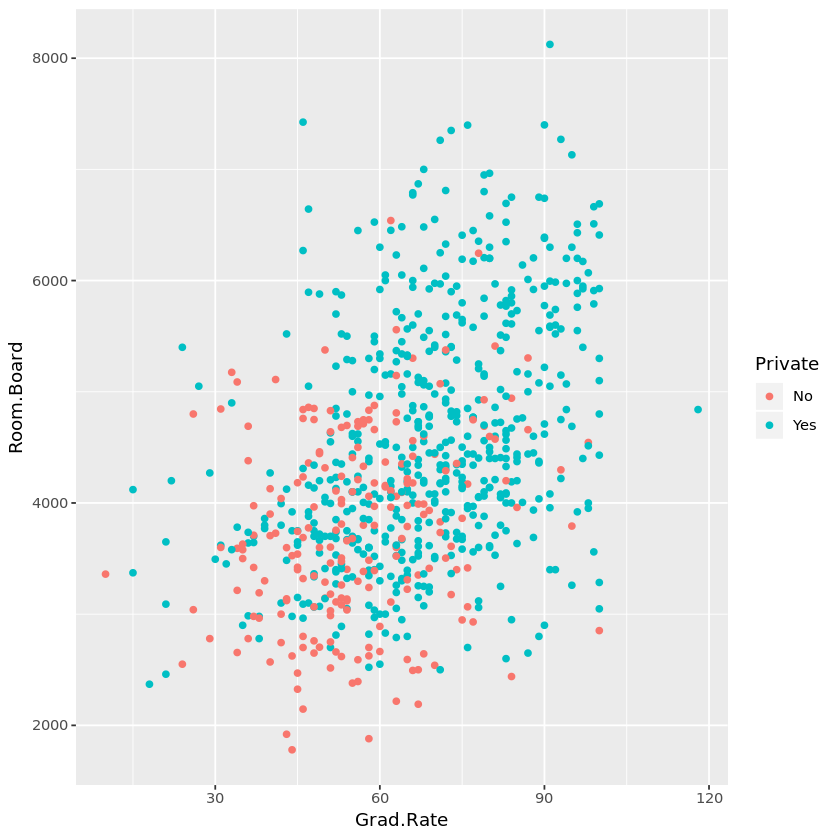

In [7]:
#Scatterplot of Grad.Rate versus Room.Board, colored by the Private column.
print(ggplot(df, aes(x=Grad.Rate,y=Room.Board))+geom_point(aes(color=Private)))

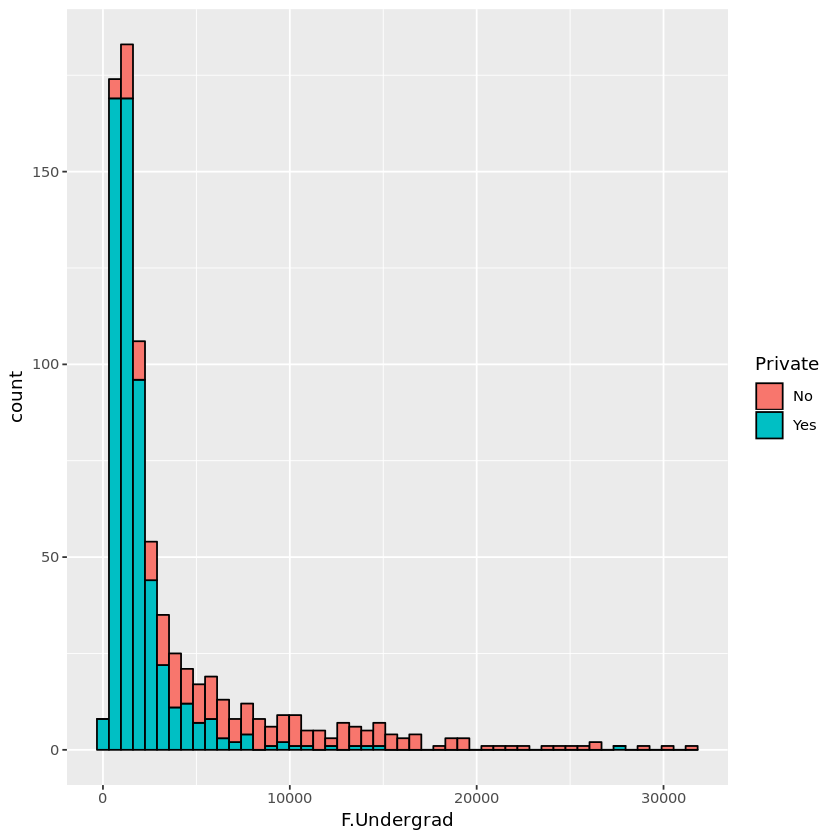

In [8]:
#histogram of full time undergrad students, color by Private
print(ggplot(df,aes(F.Undergrad))+geom_histogram(aes(fill=Private),color='black',bins=50))

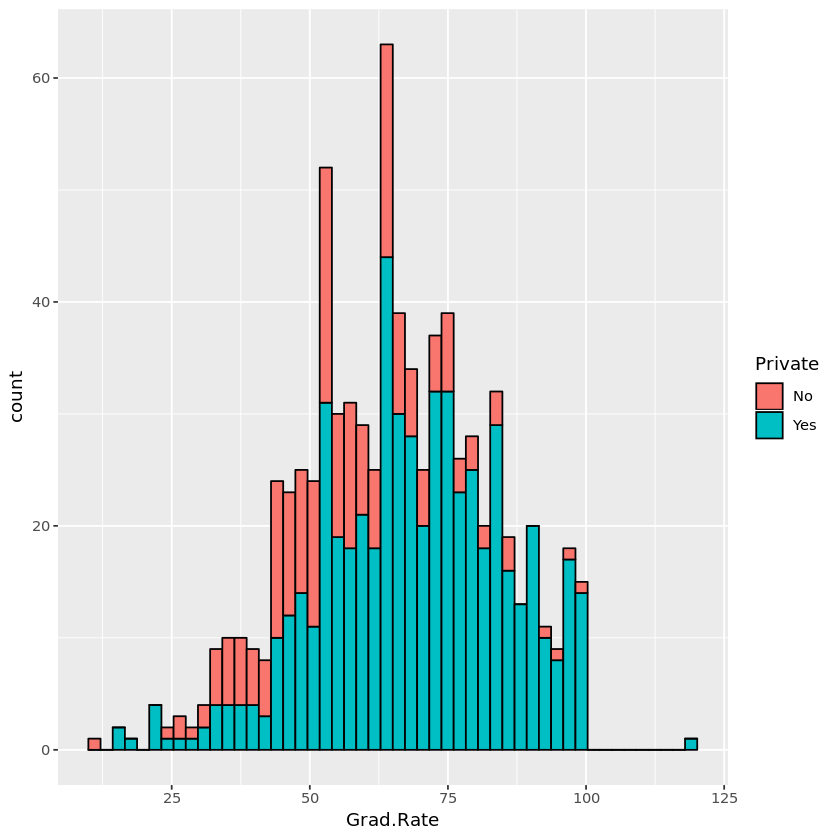

In [9]:
#histogram of Grad.Rate colored by Private
print(ggplot(df,aes(Grad.Rate))+geom_histogram(aes(fill=Private),color='black',bins=50))

In [10]:
#colleges with a Graduation Rate of above 100%
subset(df,Grad.Rate>100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
#Change that college's grad rate to 100%
df['Cazenovia College','Grad.Rate'] <- 100

In [12]:
install.packages("caTools")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’



In [13]:
library(caTools)

In [14]:
set.seed(3)
split<-sample.split(df$Private, SplitRatio = 0.7)
df.train<-subset(df,split==TRUE)
df.test<-subset(df,split==FALSE)

In [15]:
install.packages("rpart")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [16]:
library(rpart)

In [17]:
#Building decision tree with train data
tree<-rpart(Private~.,method='class',data=df.train)

In [18]:
#Predicting values using the decision tree built and test data 
predicted_value<- predict(tree,df.test)
head(predicted_value)

,No,Yes
Adelphi University,0.006349206,0.99365079
Alverno College,0.006349206,0.99365079
American International College,0.006349206,0.99365079
Andrews University,0.006349206,0.99365079
Arkansas Tech University,0.934959350,0.06504065
Augustana College,0.006349206,0.99365079


In [19]:
#Creating a new column to match the original private column
predicted_value<- as.data.frame(predicted_value)
predicted_value$Private <- ifelse(predicted_value$Yes >=0.5, "Yes", "No")

In [20]:
#confusion matrix
table(df.test$Private,predicted_value$Private)

     
       No Yes
  No   57   7
  Yes  13 156

In [23]:
install.packages("rpart.plot")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [24]:
library(rpart.plot)

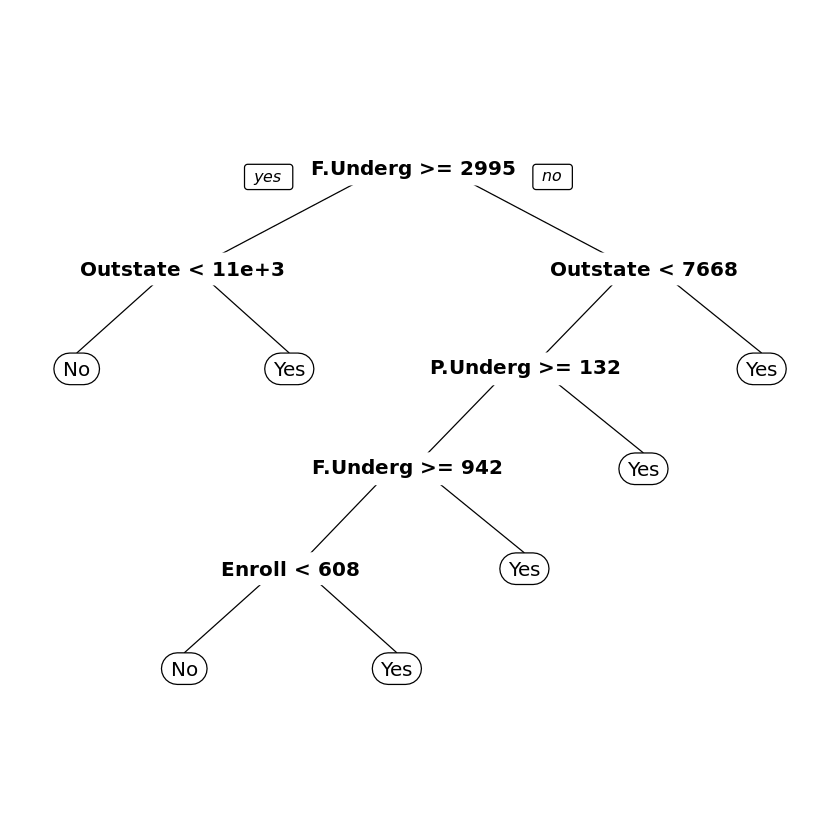

In [25]:
#plotting tree model
library(rpart.plot)
prp(tree)

In [26]:
install.packages("randomForest")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [27]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [28]:
#Building Random Forest Tree
rf.model<- randomForest(Private~.,data = df.train, importance=TRUE)

In [29]:
#Models confusion matrix
rf.model$confusion

,No,Yes,class.error
No,126,22,0.14864865
Yes,13,383,0.03282828


In [30]:
#Feature importance
rf.model$importance

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.0324910520,1.214342e-02,0.0173667381,10.110703
Accept,0.0368345272,1.564231e-02,0.0214516469,14.160122
Enroll,0.0515839966,2.835321e-02,0.0344411514,21.903264
Top10perc,0.0132838769,2.695765e-03,0.0055641593,4.343986
Top25perc,0.0060706646,2.617723e-03,0.0035162750,4.121816
F.Undergrad,0.1466555160,5.737303e-02,0.0812140462,40.753339
P.Undergrad,0.0631135021,8.741106e-03,0.0231670281,16.737614
Outstate,0.1655549548,6.252992e-02,0.0904718789,45.008109
Room.Board,0.0195430189,1.039206e-02,0.0128151634,10.623044
Books,0.0005092394,7.733776e-05,0.0001718935,2.240217


In [31]:
#Predcit values using Random Forest tree
rfpredict <- predict(rf.model, df.test)
head(rfpredict)

Adelphi University                Alverno College 
                           Yes                            Yes 
American International College             Andrews University 
                           Yes                            Yes 
      Arkansas Tech University              Augustana College 
                            No                            Yes 
Levels: No Yes